# Car Models Specifications Analysis

Dataset analysis of car specifications

- Data frame input from CVS file
- Using **Pandas** to clean, filter, and manipulate the dataset
- Using **Matplotlib** and **Seaborn** for plotting & visualization of datasets

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

carData = pd.read_csv("./sampleCarData.csv")

Here's some basic information on the data frame:

In [60]:
carData.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [139]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         432 non-null    object 
 1   Model        432 non-null    object 
 2   Type         432 non-null    object 
 3   Origin       432 non-null    object 
 4   DriveTrain   432 non-null    object 
 5   MSRP         432 non-null    object 
 6   Invoice      432 non-null    object 
 7   EngineSize   432 non-null    float64
 8   Cylinders    432 non-null    float64
 9   Horsepower   432 non-null    float64
 10  MPG_City     432 non-null    float64
 11  MPG_Highway  432 non-null    float64
 12  Weight       432 non-null    float64
 13  Wheelbase    432 non-null    float64
 14  Length       432 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [142]:
carData.shape

(432, 15)

In [143]:
carData.describe(include='all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,432,432,432,432,432,432,432,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.00000
unique,38,425,6,3,3,410,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,"$13,270","$14,207",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,6,266,162,230,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.196729,5.807512,215.885514,23.060748,26.843458,3577.953271,108.154206,186.36215
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.103438,1.547557,71.501909,5.213854,5.714497,755.453041,8.273153,14.29121
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,3.000000,73.000000,13.000000,12.000000,1850.000000,89.000000,143.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000,4.000000,165.000000,20.000000,24.000000,3108.000000,103.000000,178.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,210.000000,22.000000,26.000000,3476.500000,107.000000,187.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.825000,6.000000,251.250000,24.000000,29.000000,3968.750000,112.000000,194.00000


### Data Cleaning
Find all NULL values & fill values using mean of the column

In [62]:
carData.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [125]:
str_fill_val = None
# STR_FILL_TYPE = 0 -> fill null str values with 'NaN'
# STR_FILL_TYPE = 1 -> fill null str values with mode value

# for now, let's say we want to fill values with the mode
str_fill_val = 1

# Fill in missing values 
for series_name, series in carData.items():
    if pd.api.types.is_numeric_dtype(series): # Fill numeric values with mean of the column
       carData[series_name] = series.fillna(series.mean())

    else: # Fill object values on given condition
        if str_fill_val == 0:
            carData[series_name] = series.fillna('NaN')
        elif str_fill_val == 1:
            most_freq = series.mode()[0]
            print("Filling null values in \"" + series_name + "\" with: ", most_freq)
            carData[series_name] = series.fillna(most_freq)

        

Filling null values in "Make" with:  Toyota
Filling null values in "Model" with:  C240 4dr
Filling null values in "Type" with:  Sedan
Filling null values in "Origin" with:  Asia
Filling null values in "DriveTrain" with:  Front
Filling null values in "MSRP" with:  $13,270 
Filling null values in "Invoice" with:  $14,207 


Check for any more missing values:

In [115]:
carData.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

We're good!

### Data Visualization
1. Display the number of cars by make
2. Display MSRP distribution by number of cylinders

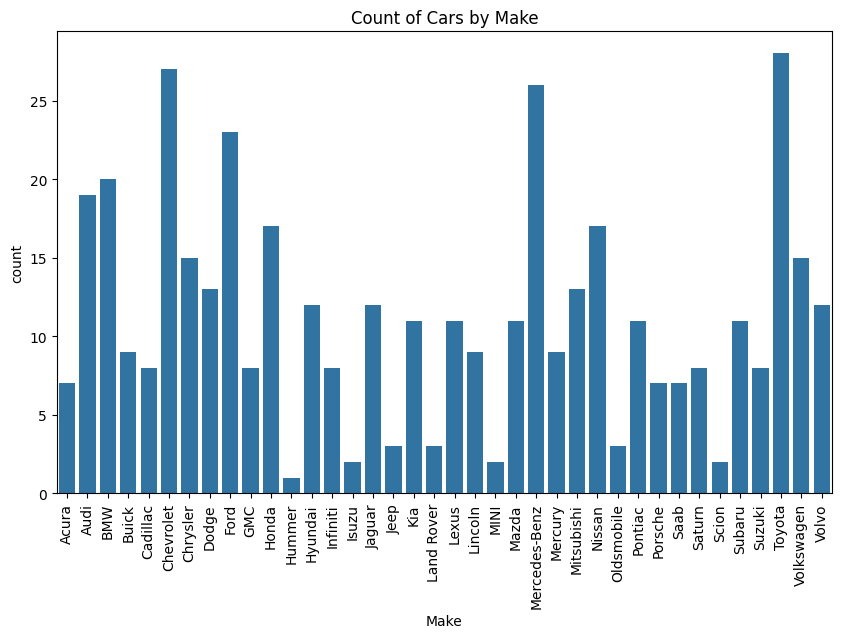

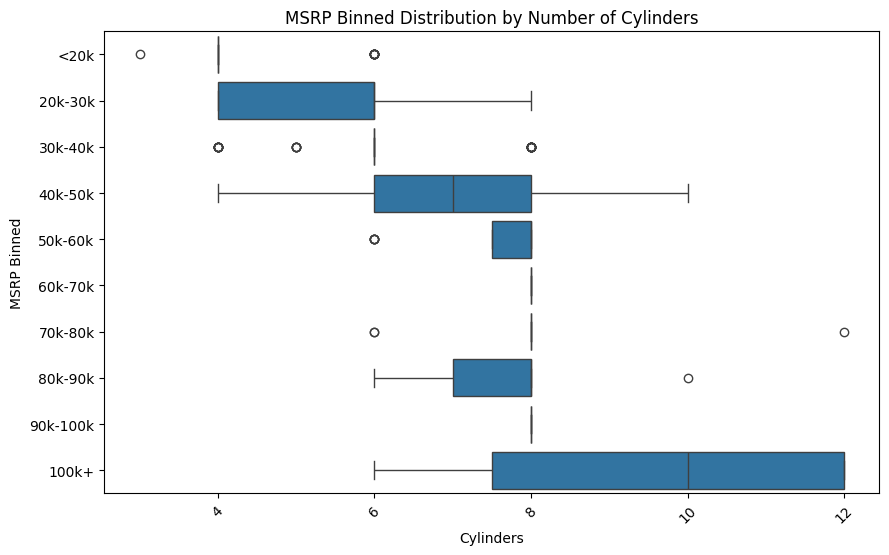

In [169]:
# Display Make distribution using a bar graph
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sb.countplot(x='Make', data=carData)
plt.title('Count of Cars by Make')
plt.xticks(rotation=90)
plt.show()

# Display MSRP distribution in correlation to cylinders
# -----------------------------------------------------

# Convert data values from object to float
carData['MSRP'] = carData['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Categorize MSRP
bins = [0, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['<20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k+']
carData['MSRP Binned'] = pd.cut(carData['MSRP'].replace(0, np.nan), bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sb.boxplot(x='Cylinders', y='MSRP Binned', data=carData)
plt.title('MSRP Binned Distribution by Number of Cylinders')
plt.xticks(rotation=45)
plt.show()

### Check Make Types & Count Occurrences

In [127]:
carData.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [129]:
carData['Make'].value_counts()

Make
Toyota           32
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Jaguar           12
Volvo            12
Kia              11
Mazda            11
Lexus            11
Pontiac          11
Subaru           11
Lincoln           9
Mercury           9
Buick             9
Saturn            8
Infiniti          8
GMC               8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Hummer            1
Name: count, dtype: int64

### Filtering Values
Filtering for all recrods where origin is Asia or Europe

In [131]:
carData[carData['Origin'].isin(['Asia', 'Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


Check for records with duplicates of the same model:

In [187]:
# Filter to get duplicate models
carData.groupby('Model').filter(lambda x: len(x) > 1)


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Cylinders_Cat,MSRP_Binned,MSRP Binned
183,Infiniti,G35 4dr,Sedan,Asia,Rear,28495.0,"$26,157",3.5,6.0,260.0,18.0,26.0,3336.0,112.0,187.0,5-6,20k-30k,20k-30k
185,Infiniti,G35 4dr,Sedan,Asia,All,32445.0,"$29,783",3.5,6.0,260.0,18.0,26.0,3677.0,112.0,187.0,5-6,30k-40k,30k-40k
259,Mercedes-Benz,C240 4dr,Sedan,Europe,Rear,32280.0,"$30,071",2.6,6.0,168.0,20.0,25.0,3360.0,107.0,178.0,5-6,30k-40k,30k-40k
260,Mercedes-Benz,C240 4dr,Sedan,Europe,All,33480.0,"$31,187",2.6,6.0,168.0,19.0,25.0,3360.0,107.0,178.0,5-6,30k-40k,30k-40k
262,Mercedes-Benz,C320 4dr,Sedan,Europe,Rear,37630.0,"$35,046",3.2,6.0,215.0,20.0,26.0,3450.0,107.0,178.0,5-6,30k-40k,30k-40k
263,Mercedes-Benz,C320 4dr,Sedan,Europe,All,38830.0,"$36,162",3.2,6.0,215.0,19.0,27.0,3450.0,107.0,178.0,5-6,30k-40k,30k-40k


### Instructions
1. Remove all records where weight is above 4000
2. Increae all values of "MPG_City" column by 3

In [134]:
carData[~(carData['Weight'] > 4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [135]:
carData['MPG_City'] = carData['MPG_City'].apply(lambda x:x+3)

In [137]:
carData
# Notice all values under MPG_City has increased by 3

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,20.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,24.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,23.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,22.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,25.0,29.0,2822.0,101.0,180.0


### Correlation Analysis
Generate correlation matrix between all numeric data points

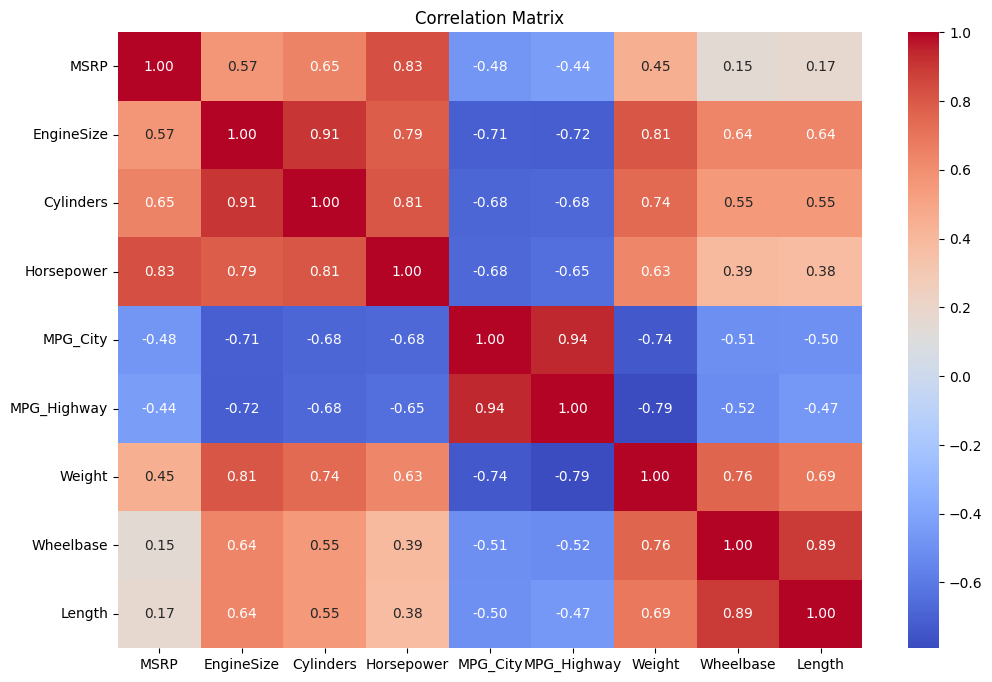

In [172]:
numericData = carData.select_dtypes(include=['float64'])
corrMatrix = numericData.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()